<a href="https://colab.research.google.com/github/Avisweta-De/Practice-stuffs/blob/main/Box_cox_%26_yeo_johnson_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [30]:
# prompt: uplad csv file code

from google.colab import files

uploaded = files.upload()



Saving cars.csv to cars (3).csv


In [31]:
df=pd.read_csv("cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [32]:
df.isnull().sum()

,0
brand,0
km_driven,0
fuel,0
owner,0
selling_price,0


In [35]:
x = df.drop(columns=['selling_price', 'brand','owner','fuel'])
y = df.iloc[:, -1]
x

,km_driven
0,145500
1,120000
2,140000
3,127000
4,120000
...,...
8123,110000
8124,119000
8125,120000
8126,25000


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.06581739438262002

In [40]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.044123781298836186)

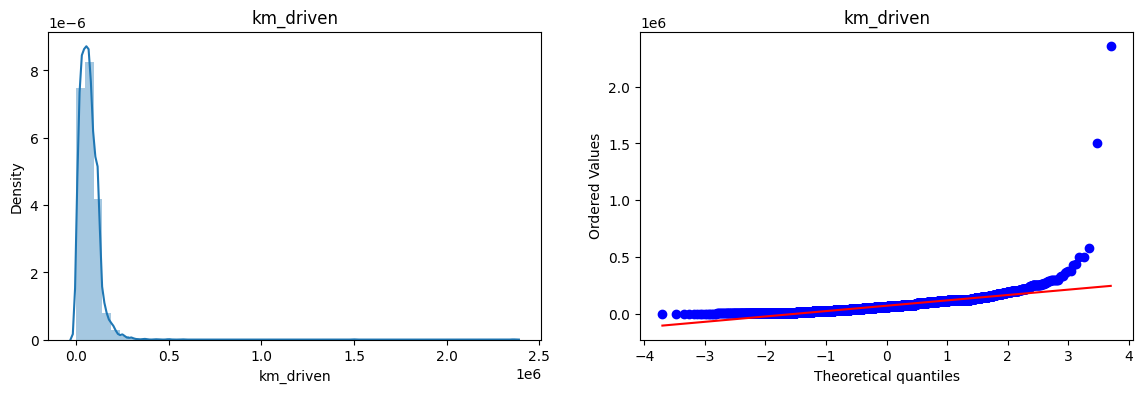

In [41]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()


In [42]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,km_driven,0.361979


In [43]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.11437339219150311

In [45]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.09955098084387068)

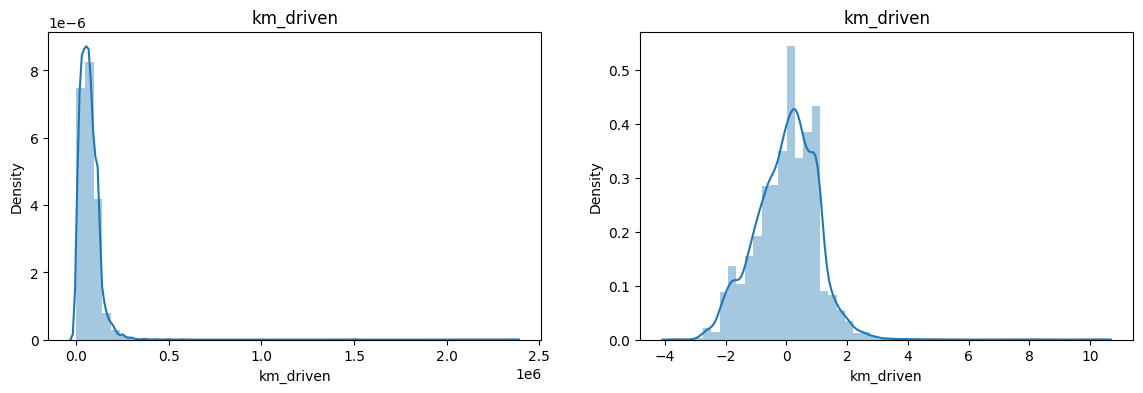

In [46]:
#Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [47]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.11437499827436204


,cols,Yeo_Johnson_lambdas
0,km_driven,0.361938


In [49]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)


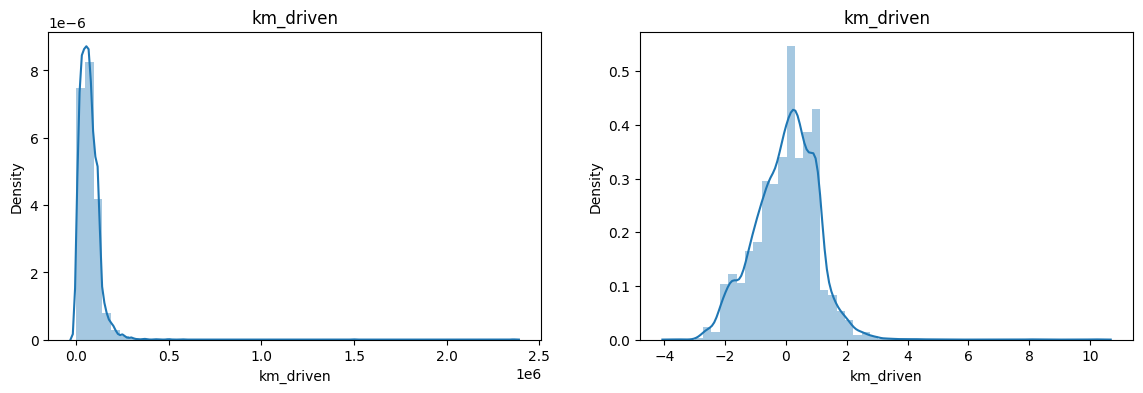

In [51]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [52]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,km_driven,0.367942,0.361938
